In [18]:
import pandas as pd
import numpy as np


# Baca data iris
try:
    df = pd.read_csv('iris/iris.csv', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])
except FileNotFoundError:
    print("File iris.csv tidak ditemukan. Pastikan file berada di direktori yang benar.")
    raise

# Cek missing values
print("Missing Attribute Values:", "None" if df.isnull().sum().sum() == 0 else df.isnull().sum().sum())

# Hitung statistik deskriptif
stats = pd.DataFrame({
    'Min': df.iloc[:, 0:4].min(),
    'Max': df.iloc[:, 0:4].max(),
    'Mean': df.iloc[:, 0:4].mean().round(2),
    'SD': df.iloc[:, 0:4].std().round(2)
})

# Hitung korelasi dengan class (menggunakan label encoding untuk species)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

correlations = []
for column in df.columns[0:4]:
    correlation = df[column].corr(df['species_encoded'])
    correlations.append(round(correlation, 4))

stats['Class Correlation'] = correlations

# Format output
print("\nSummary Statistics:")
for index, row in stats.iterrows():
    correlation_text = f"{row['Class Correlation']:.4f}"
    if abs(row['Class Correlation']) > 0.8:
        correlation_text += " (high!)"
        
    print(f"{index:>12}: {row['Min']:>4.1f} {row['Max']:>4.1f} {row['Mean']:>4.2f} {row['SD']:>4.2f}  {correlation_text}")



Missing Attribute Values: None

Summary Statistics:
sepal length:  4.3  7.9 5.84 0.83  0.7826
 sepal width:  2.0  4.4 3.05 0.43  -0.4194
petal length:  1.0  6.9 3.76 1.76  0.9490 (high!)
 petal width:  0.1  2.5 1.20 0.76  0.9565 (high!)


In [25]:
import pandas as pd
from sklearn.datasets import load_iris

# Memuat dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

# Menghitung statistik dasar
stats = {
    "Min": df.min(),
    "Max": df.max(),
    "Mean": df.mean(),
    "Std Deviasi": df.std(),
    "Class Correlation": df.corrwith(df['Sepal Length'])  # Contoh korelasi dengan 'Sepal Length'
}

# Mengonversi hasil menjadi DataFrame
stats_df = pd.DataFrame(stats)
print(stats_df)

#KESIMPULAN NO 1

# Nilai Minimum dan Maksimum:

# Sepal Length: Rentang dari 4.3 hingga 7.9.
# Sepal Width: Rentang dari 2.0 hingga 4.4.
# Petal Length: Rentang dari 1.0 hingga 6.9.
# Petal Width: Rentang dari 0.1 hingga 2.5.
# Nilai Rata-rata (Mean):

# Sepal Length: 5.843333
# Sepal Width: 3.057333
# Petal Length: 3.758000
# Petal Width: 1.199333
# Standar Deviasi:

# Sepal Length: 0.828066
# Sepal Width: 0.435866
# Petal Length: 1.765298
# Petal Width: 0.762238
# Korelasi dengan Sepal Length:

# Sepal Length memiliki korelasi tertinggi dengan dirinya sendiri (1.000000).
# Sepal Width memiliki korelasi negatif yang rendah dengan Sepal Length (-0.117570), menunjukkan bahwa Sepal Width sedikit berlawanan dengan Sepal Length.
# Petal Length dan Petal Width memiliki korelasi positif tinggi dengan Sepal Length, masing-masing sebesar 0.871754 dan 0.817941, yang menunjukkan bahwa panjang dan lebar kelopak bunga berkaitan erat dengan panjang sepal.
# Secara keseluruhan, data ini menunjukkan bahwa fitur Petal Length dan Petal Width memiliki hubungan yang cukup kuat dengan Sepal Length, sedangkan Sepal Width tidak terlalu berkaitan dengan fitur lainnya.

              Min  Max      Mean  Std Deviasi  Class Correlation
Sepal Length  4.3  7.9  5.843333     0.828066           1.000000
Sepal Width   2.0  4.4  3.057333     0.435866          -0.117570
Petal Length  1.0  6.9  3.758000     1.765298           0.871754
Petal Width   0.1  2.5  1.199333     0.762238           0.817941


C:\Users\faith\AppData\Local\Temp\ipykernel_24924\66972062.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y='sepal length', data=df, palette=['#6495ED', '#40E0D0', '#4c72b0'])


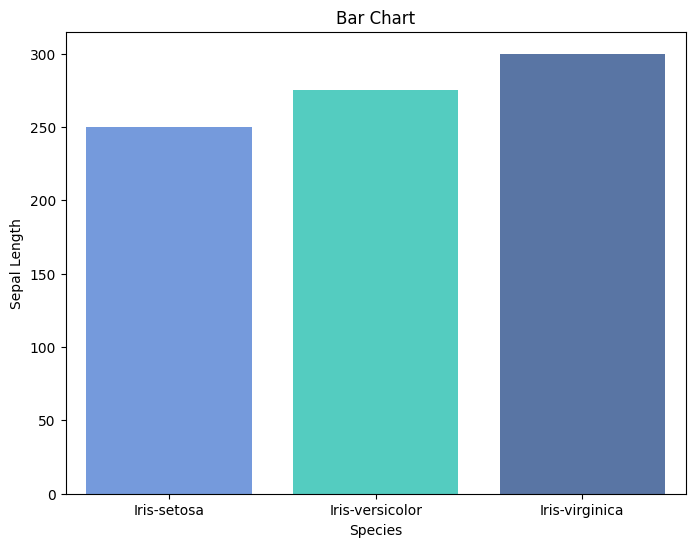

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    'sepal length': [250, 275, 300]  
}
df = pd.DataFrame(data)

# Membuat diagram batang
plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='sepal length', data=df, palette=['#6495ED', '#40E0D0', '#4c72b0'])  

# Memberikan judul dan label
plt.title('Bar Chart')
plt.xlabel('Species')
plt.ylabel('Sepal Length')

# Menampilkan grafik
plt.show()


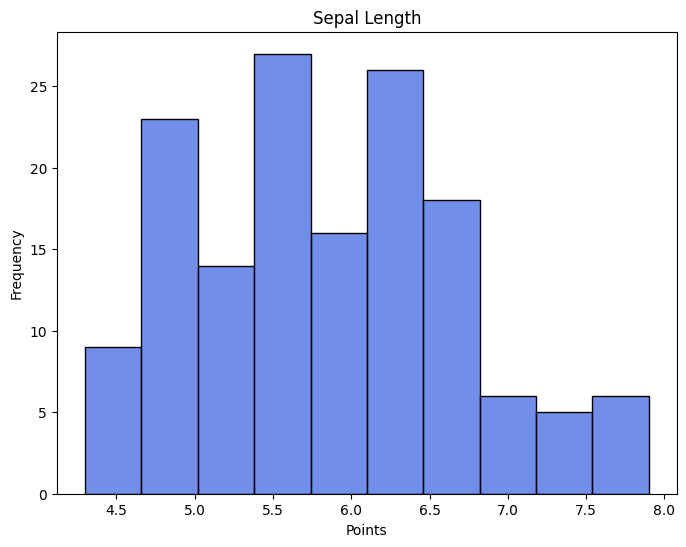

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file csv
df = pd.read_csv('iris/iris.csv', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])

# Membuat histogram untuk sepal length
plt.figure(figsize=(8, 6))
sns.histplot(df['sepal length'], bins=10, color='royalblue')  # Menyesuaikan warna dan jumlah bins sesuai gambar

# Memberikan judul dan label
plt.title('Sepal Length')
plt.xlabel('Points')
plt.ylabel('Frequency')

# Menampilkan grafik
plt.show()


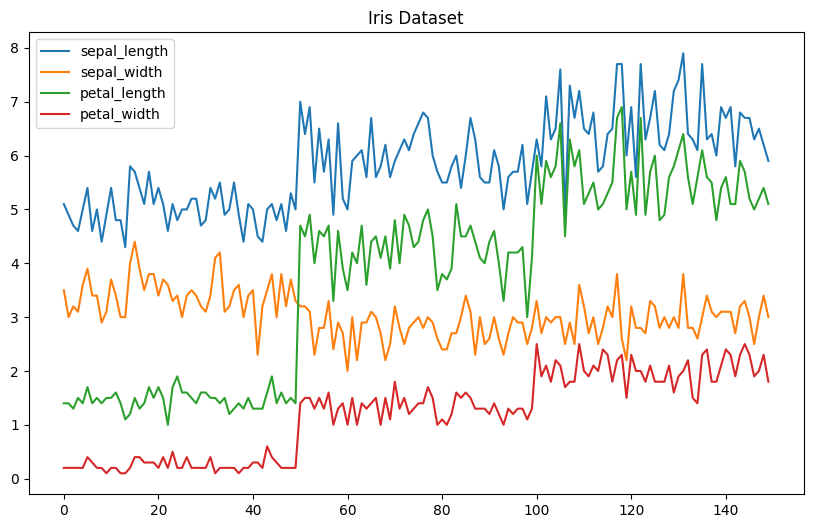

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Memuat dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(df['sepal length (cm)'], label='sepal_length')
plt.plot(df['sepal width (cm)'], label='sepal_width')
plt.plot(df['petal length (cm)'], label='petal_length')
plt.plot(df['petal width (cm)'], label='petal_width')

# Menambahkan judul dan label
plt.title('Iris Dataset')
plt.legend()
plt.show()


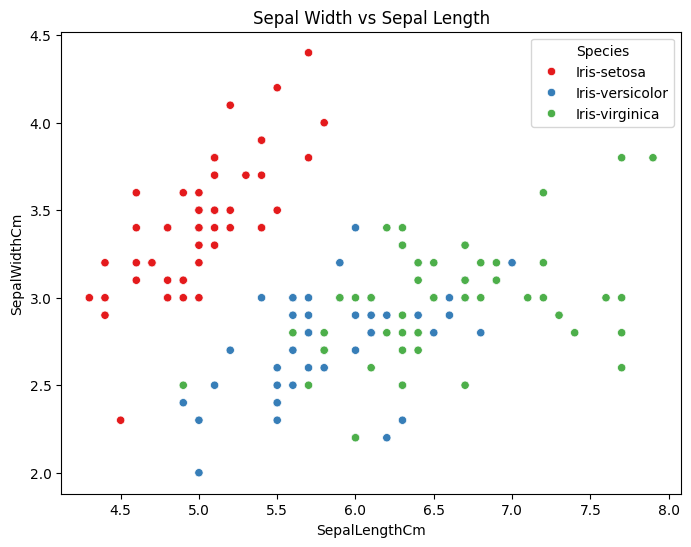

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Memuat dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target

# Mengubah nilai target menjadi nama spesies
species_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
df['Species'] = df['Species'].map(species_mapping)

# Membuat scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Species', palette='Set1')

# Menambahkan judul dan label sumbu
plt.title('Sepal Width vs Sepal Length')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(title='Species')
plt.show()
